# STOCK PRICE TIME SERIES FORECAST AND ML PREDICTIONS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("GOOGL.csv")

In [3]:
data.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


In [4]:
data.shape

(4431, 7)

In [5]:
data_ml=data[["Open","High","Low","Close","Volume"]]

In [6]:
data_ml.head()

,Open,High,Low,Close,Volume
0,50.050049,52.082081,48.028027,50.220219,44659096
1,50.555557,54.594597,50.300301,54.209209,22834343
2,55.430431,56.796799,54.579578,54.754753,18256126
3,55.675674,55.855858,51.836838,52.487488,15247337
4,52.532532,54.054054,51.991993,53.053055,9188602


In [7]:
data.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [8]:
for i in data_ml.columns:
    data_ml[i]=data_ml[i].astype(int)

C:\Users\Hi\AppData\Local\Temp\ipykernel_10700\2042879223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_ml[i]=data_ml[i].astype(int)


In [9]:
data_ml.dtypes

Open      int32
High      int32
Low       int32
Close     int32
Volume    int32
dtype: object

<AxesSubplot:>

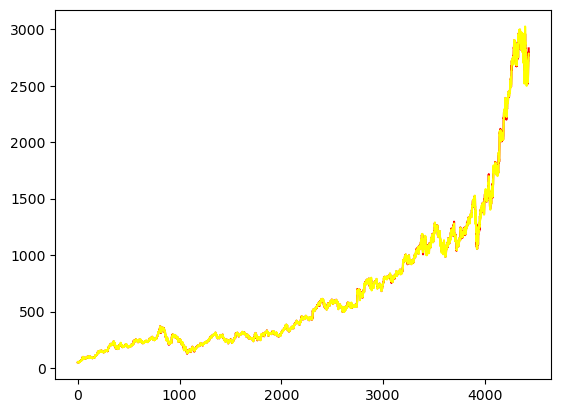

In [10]:
data_ml['Close'].plot(kind="line",color="red")
data_ml["Open"].plot(kind="line",color="yellow")

In [11]:
from sklearn.linear_model import LinearRegression

C:\Users\Hi\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [12]:
lr=LinearRegression()

In [13]:
from sklearn.ensemble import RandomForestRegressor

In [14]:
rf=RandomForestRegressor()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
x=data_ml[["Open","High","Low","Volume"]]
y=data_ml["Close"]

# Automated function for prediction of stock

In [18]:
def predict(x,y,ml_model):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
    ml_model.fit(x_train,y_train)
    predictions=ml_model.predict(x_test)
    print("The error is ",np.sqrt(predictions,y_test))
    
    

# TIME SERIES PREDICTION

In [19]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602


# BASE LINE MODEL

In [20]:
data["Base_Close"]=data["Close"].shift(1)

In [21]:
data["Date"]=pd.to_datetime(data["Date"])

In [22]:
data.set_index("Date")

,Open,High,Low,Close,Adj Close,Volume,Base_Close
Date,,,,,,,
2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,NaN
2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,50.220219
2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,54.209209
2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,54.754753
2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,52.487488
...,...,...,...,...,...,...,...
2022-03-18,2668.489990,2724.879883,2645.169922,2722.510010,2722.510010,2223100,2676.780029
2022-03-21,2723.270020,2741.000000,2681.850098,2722.030029,2722.030029,1341600,2722.510010
2022-03-22,2722.030029,2821.000000,2722.030029,2797.360107,2797.360107,1774800,2722.030029


In [23]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Base_Close
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,NaN
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,50.220219
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,54.209209
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,54.754753
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,52.487488


In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
print("The mean squared error",mean_squared_error(data["Base_Close"][1:],data["Close"][1:]))

The mean squared error 257.5809206613273


In [26]:
import matplotlib.pyplot as plt

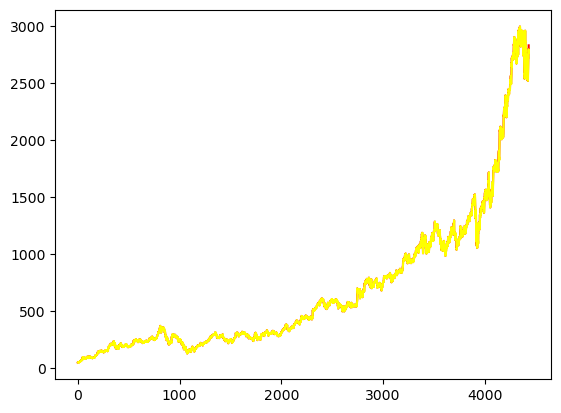

In [27]:
plt.plot(data["Close"],color="red")
plt.plot(data["Base_Close"],color="yellow")


<AxesSubplot:>

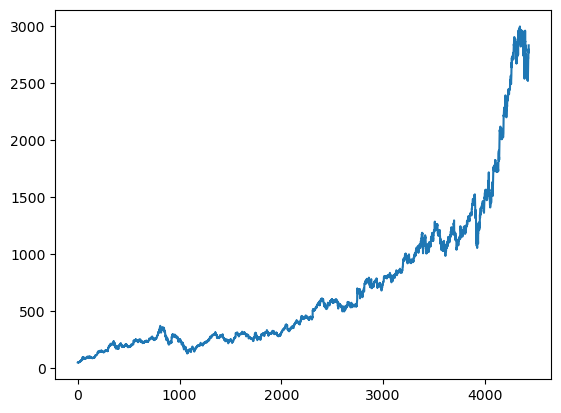

In [28]:
data["Close"].plot()

In [29]:
from statsmodels.tsa.stattools import adfuller

In [30]:
results=adfuller(data["Close"])

In [31]:
print(results)

(3.200981270322802, 1.0, 27, 4403, {'1%': -3.431836058709514, '5%': -2.862196657661241, '10%': -2.5671195430329568}, 36779.89743477227)


# Eliminating trends

In [32]:
data["log_Close"]=np.log(data["Close"])

In [33]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Base_Close,log_Close
0,2004-08-19,50.050049,52.082081,48.028027,50.220219,50.220219,44659096,NaN,3.916418
1,2004-08-20,50.555557,54.594597,50.300301,54.209209,54.209209,22834343,50.220219,3.992851
2,2004-08-23,55.430431,56.796799,54.579578,54.754753,54.754753,18256126,54.209209,4.002864
3,2004-08-24,55.675674,55.855858,51.836838,52.487488,52.487488,15247337,54.754753,3.960575
4,2004-08-25,52.532532,54.054054,51.991993,53.053055,53.053055,9188602,52.487488,3.971292


In [34]:
data["log_Close_rolling"]=data["Close"].rolling(window=7).mean()

<AxesSubplot:>

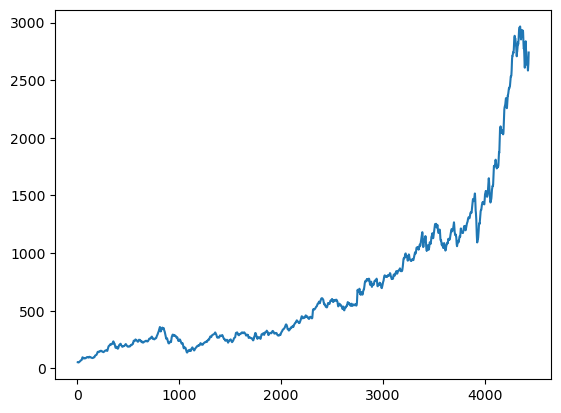

In [35]:
data["log_Close_rolling"].plot(kind="line")

In [36]:
mean=data["Close"].rolling(window=7).mean()
std=data["Close"].rolling(window=7).std()

<AxesSubplot:>

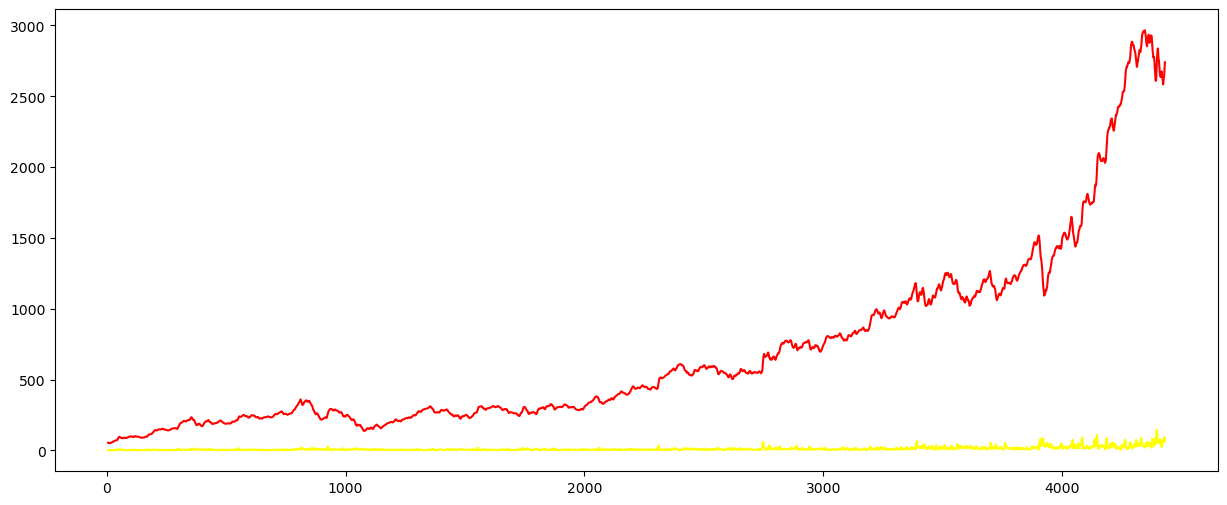

In [37]:
plt.figure(figsize=(15,6))
mean.plot(label="mean",color="red")
std.plot(label="std",color="yellow")

ADFULLER TEST

In [38]:
from statsmodels.tsa.stattools import adfuller

In [39]:
results=adfuller(data['Close'])
values=['ADF','P','LAGS ','NO.OF.OBS ']
for val,res in zip(values,results):
    print('{};{}'.format(val,res))

ADF;3.200981270322802
P;1.0
LAGS ;27
NO.OF.OBS ;4403


Closing values have trends in them, hence P value is >0.05

Function for detecting the stationarity

In [40]:
def test_for_stationarity(df,feature):
    mean=df[feature].rolling(window=7).mean()
    std=df[feature].rolling(window=7).std()
    plt.figure(figsize=(15,6))
    mean.plot(kind="line",color="blue",label="mean")
    std.plot(kind="line",color="yellow",label="std")
    results=adfuller(df[feature])
    values=['ADF','P','lags','obs']
    for val,res in zip(values,results):
        print('{}:{}'.format(val,res))
        

ADF:3.200981270322802
P:1.0
lags:27
obs:4403


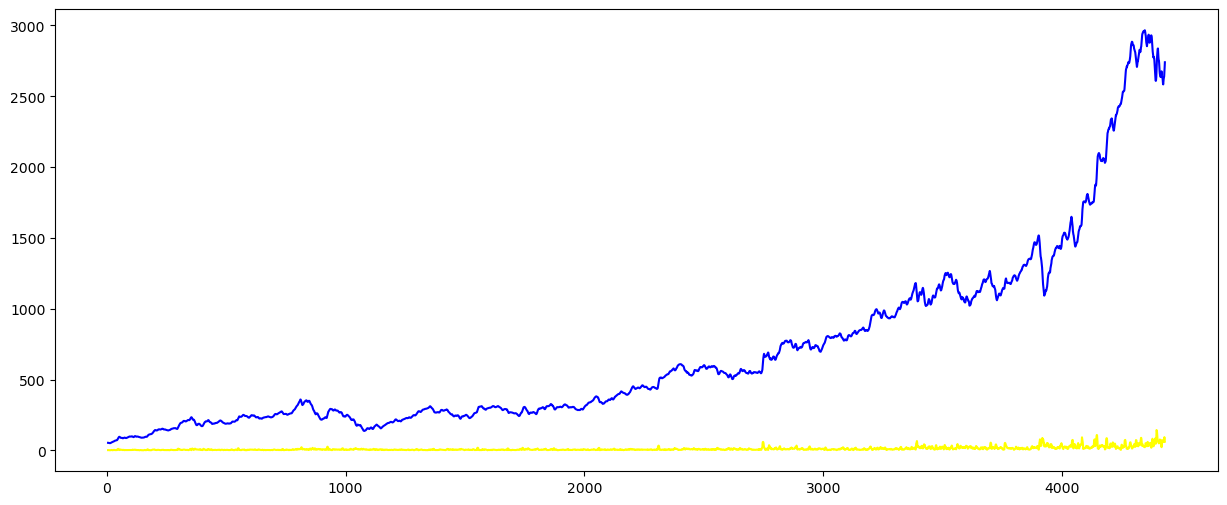

In [41]:
test_for_stationarity(data,'Close')

In [42]:
close_data=pd.DataFrame(data[["Date","Close"]])

In [43]:
close_data.set_index("Date",inplace=True)

In [44]:
close_data.head(5)

,Close
Date,
2004-08-19,50.220219
2004-08-20,54.209209
2004-08-23,54.754753
2004-08-24,52.487488
2004-08-25,53.053055


In [45]:
close_data["log_close"]=np.log(close_data["Close"])

In [46]:
close_data

,Close,log_close
Date,,
2004-08-19,50.220219,3.916418
2004-08-20,54.209209,3.992851
2004-08-23,54.754753,4.002864
2004-08-24,52.487488,3.960575
2004-08-25,53.053055,3.971292
...,...,...
2022-03-18,2722.510010,7.909310
2022-03-21,2722.030029,7.909133
2022-03-22,2797.360107,7.936431


ADF:-1.577199822725377
P:0.495035839809126
lags:7
obs:4423


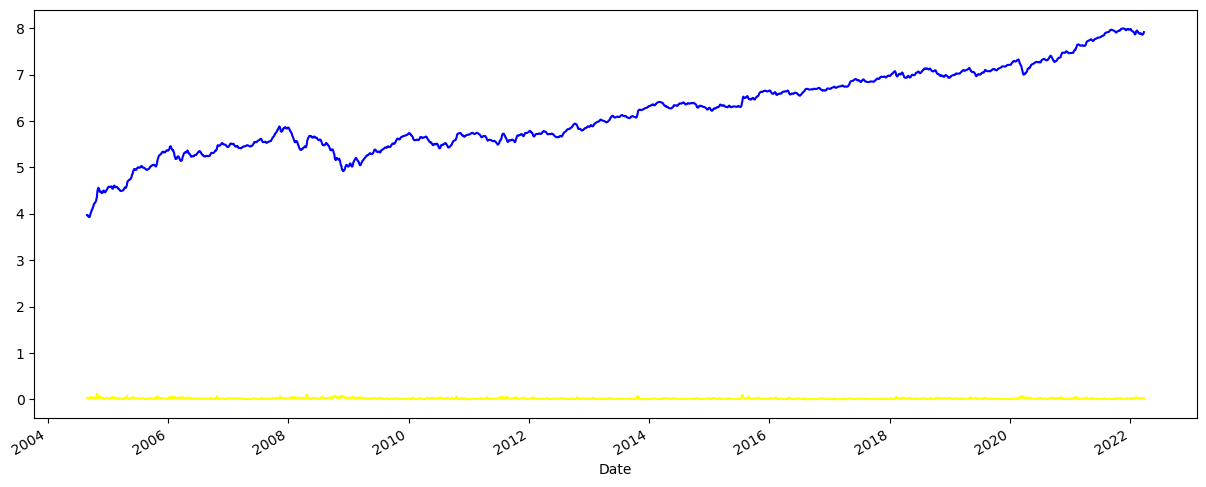

In [47]:
test_for_stationarity(close_data,"log_close")

In [48]:
close_data["Rolling_log"]=close_data["log_close"].rolling(window=7).mean()

In [49]:
close_data["rolling_diff"]=close_data["Rolling_log"]-close_data["log_close"]

In [50]:
close_data.head(20)

,Close,log_close,Rolling_log,rolling_diff
Date,,,,
2004-08-19,50.220219,3.916418,NaN,NaN
2004-08-20,54.209209,3.992851,NaN,NaN
2004-08-23,54.754753,4.002864,NaN,NaN
2004-08-24,52.487488,3.960575,NaN,NaN
2004-08-25,53.053055,3.971292,NaN,NaN
2004-08-26,54.009010,3.989151,NaN,NaN
2004-08-27,53.128128,3.972707,3.972265,-0.000441
2004-08-30,51.056057,3.932924,3.974623,0.041699
2004-08-31,51.236237,3.936447,3.966566,0.030119


In [51]:
close_data.dropna(inplace=True)

ADF:-1.0557421438093217
P:0.7323950603985301
lags:31
obs:4393


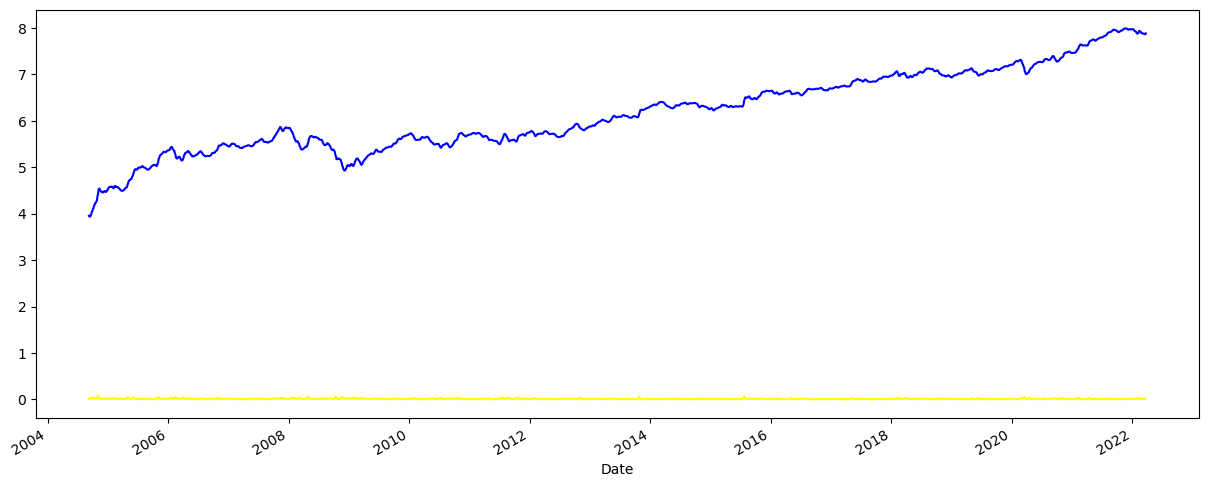

In [52]:
test_for_stationarity(close_data,"Rolling_log")

ADF:-19.21654614910602
P:0.0
lags:7
obs:4417


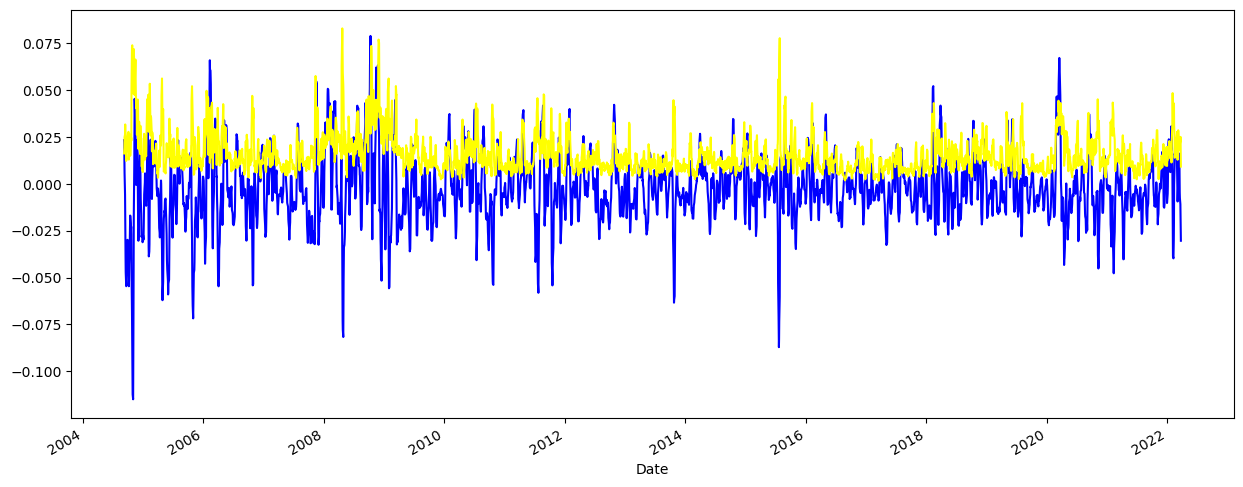

In [53]:
test_for_stationarity(close_data,"rolling_diff")

# Rolling _diff obtained is stationary

# FORECASTING USING FBPROPHET

In [54]:
from prophet import Prophet

In [55]:
model=Prophet()

In [56]:
df=close_data[["Close"]]

In [57]:
df.head(5)

,Close
Date,
2004-08-27,53.128128
2004-08-30,51.056057
2004-08-31,51.236237
2004-09-01,50.175175
2004-09-02,50.805805


In [58]:
df.reset_index(inplace=True)

In [59]:
df.tail(5)

,Date,Close
4420,2022-03-18,2722.510010
4421,2022-03-21,2722.030029
4422,2022-03-22,2797.360107
4423,2022-03-23,2765.510010
4424,2022-03-24,2831.439941


In [60]:
df.columns=["ds","y"]

In [61]:
df.head(5)

,ds,y
0,2004-08-27,53.128128
1,2004-08-30,51.056057
2,2004-08-31,51.236237
3,2004-09-01,50.175175
4,2004-09-02,50.805805


In [62]:
m=model.fit(df)

16:10:31 - cmdstanpy - INFO - Chain [1] start processing
16:10:33 - cmdstanpy - INFO - Chain [1] done processing


In [63]:
future=m.make_future_dataframe(freq="D",periods=500)

In [64]:
future.shape

(4925, 1)

In [65]:
future.tail(5)

,ds
4920,2023-08-02
4921,2023-08-03
4922,2023-08-04
4923,2023-08-05
4924,2023-08-06


In [66]:
forecast=m.predict(future)

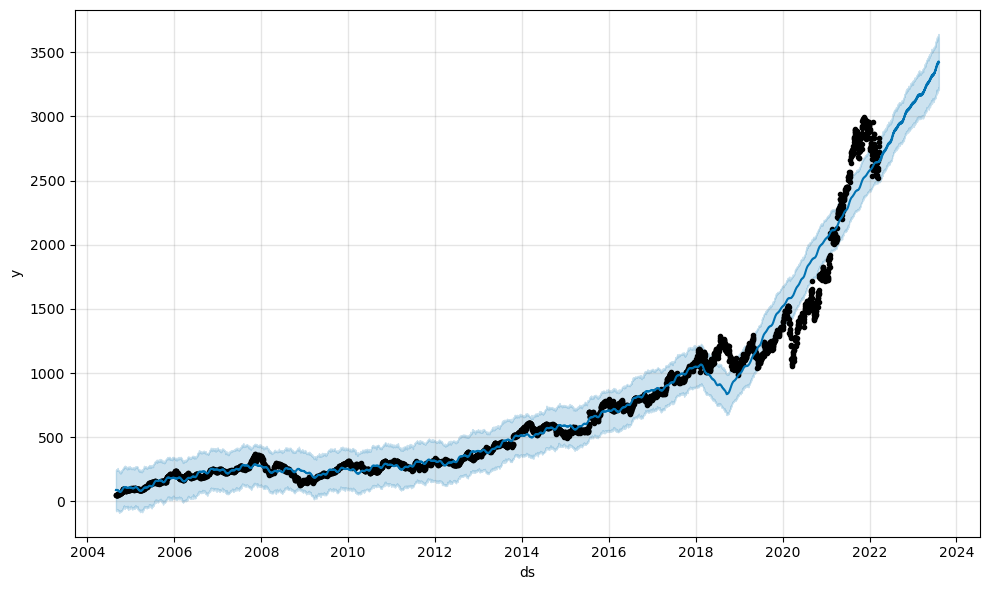

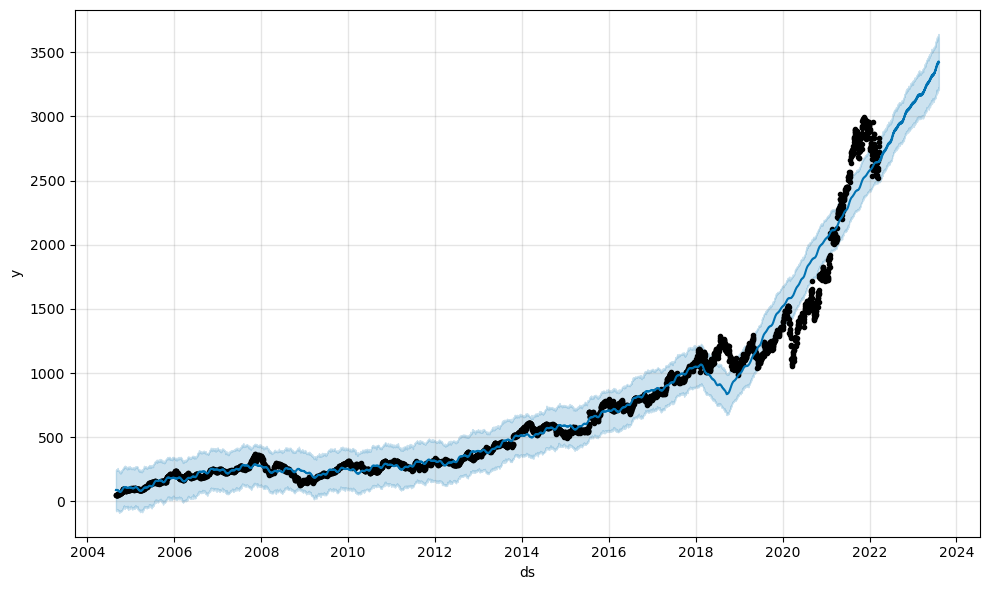

In [67]:
m.plot(forecast)

In [68]:
forecast.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2004-08-27,67.989819,-69.993729,244.869688,67.989819,67.989819,19.925077,19.925077,19.925077,3.602968,3.602968,3.602968,16.322109,16.322109,16.322109,0.0,0.0,0.0,87.914896
1,2004-08-30,68.605263,-77.861936,238.978506,68.605263,68.605263,18.500327,18.500327,18.500327,1.814434,1.814434,1.814434,16.685893,16.685893,16.685893,0.0,0.0,0.0,87.105591
2,2004-08-31,68.810411,-64.998441,248.713701,68.810411,68.810411,18.936962,18.936962,18.936962,2.204764,2.204764,2.204764,16.732198,16.732198,16.732198,0.0,0.0,0.0,87.747373
3,2004-09-01,69.015559,-63.465583,248.791177,69.015559,69.015559,20.395178,20.395178,20.395178,3.666112,3.666112,3.666112,16.729066,16.729066,16.729066,0.0,0.0,0.0,89.410737
4,2004-09-02,69.220707,-64.178766,246.103254,69.220707,69.220707,20.710164,20.710164,20.710164,4.039958,4.039958,4.039958,16.670207,16.670207,16.670207,0.0,0.0,0.0,89.930871


# ARIMA model

In [69]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [70]:
from statsmodels.tsa.arima.model import ARIMA

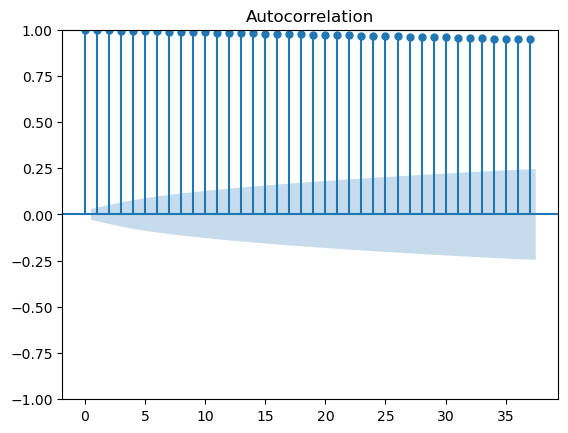

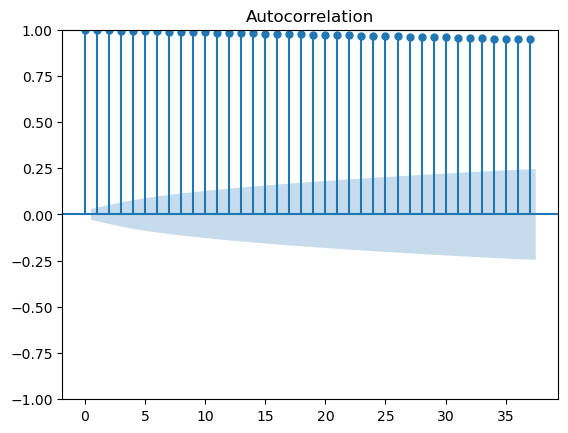

In [71]:
plot_acf(close_data["Close"])

C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


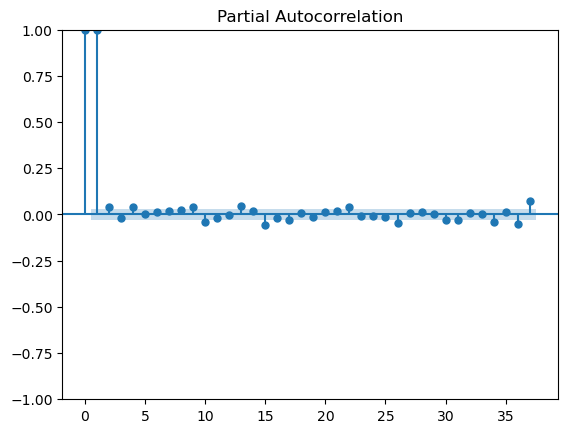

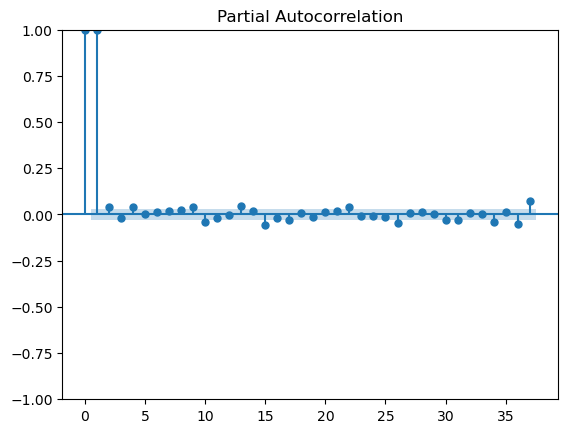

In [72]:
plot_pacf(close_data["Close"])

C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


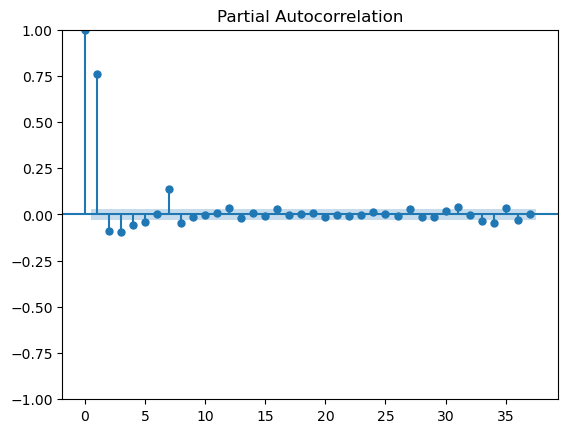

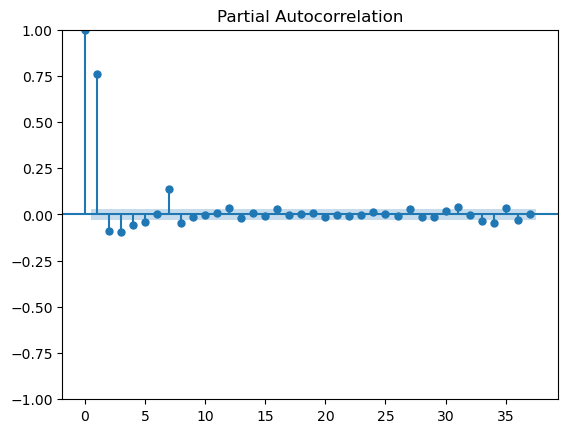

In [101]:
plot_pacf(close_data["rolling_diff"])

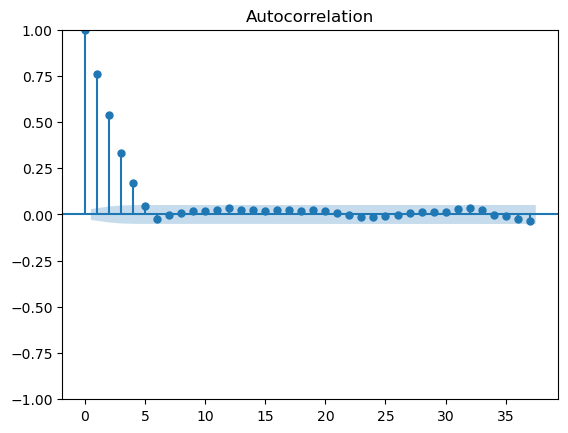

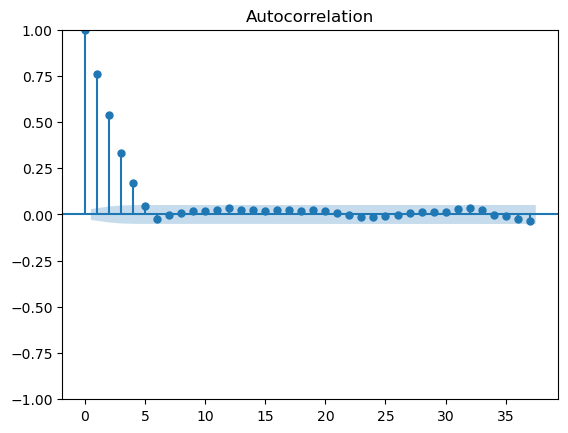

In [100]:
plot_acf(close_data["rolling_diff"])

In [73]:
df.shape

(4425, 2)

In [74]:
df.reset_index(inplace=True)

In [75]:
df.head(5)

,index,ds,y
0,0,2004-08-27,53.128128
1,1,2004-08-30,51.056057
2,2,2004-08-31,51.236237
3,3,2004-09-01,50.175175
4,4,2004-09-02,50.805805


In [76]:
train=df["y"][0:4000]

In [77]:
type(train)

pandas.core.series.Series

In [78]:
test=df["y"][4001:]

In [79]:
train_array=np.asarray(train)

In [80]:
arima=ARIMA(train_array,order=(2,1,3))

In [81]:
model=arima.fit()

C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [82]:
arima_df=pd.DataFrame(model.forecast(424))

In [83]:
arima_df.head(5)

,0
0,1517.658889
1,1517.395438
2,1517.054485
3,1517.893791
4,1516.731024


In [84]:
arima_df.shape

(424, 1)

In [85]:
test.shape

(424,)

In [86]:
type(test)

pandas.core.series.Series

In [87]:
arima_df.columns

RangeIndex(start=0, stop=1, step=1)

In [88]:
from sklearn.metrics import mean_squared_error

In [89]:
print("The error is ",np.sqrt(mean_squared_error(arima_df[0],test)))

The error is  912.9708223675286


# The error obtained using arima model is 1478

# ARIMA ON ROLLING DIFF

In [90]:
close_data.head(5)

,Close,log_close,Rolling_log,rolling_diff
Date,,,,
2004-08-27,53.128128,3.972707,3.972265,-0.000441
2004-08-30,51.056057,3.932924,3.974623,0.041699
2004-08-31,51.236237,3.936447,3.966566,0.030119
2004-09-01,50.175175,3.915520,3.954088,0.038568
2004-09-02,50.805805,3.928011,3.949436,0.021425


In [91]:
close_data.shape

(4425, 4)

In [92]:
train=close_data["rolling_diff"][0:4000]

In [93]:
test=close_data["rolling_diff"][4001:]

In [94]:
arima=ARIMA(train,order=(2,1,2))

C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [95]:
model_2=arima.fit()

C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [96]:
arima_df2=pd.DataFrame(model_2.forecast(424))

C:\Users\Hi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [97]:
arima_df2.head(5)

,predicted_mean
4000,0.001986
4001,0.000043
4002,0.000391
4003,-0.001057
4004,-0.000540


In [98]:
print("The error is",np.sqrt(mean_squared_error(arima_df2["predicted_mean"],test)))

The error is 0.022297765617091802


# The error has been drastically reduced